# Task 2

## "Principal Components"

**author:** "Gökberk Abdullah" 

**school number:** "090170341"

**date:** "May 29, 2023"

**Task 2:** Find a data set which is suitable for classification (you can use one of the data sets which you used in Homework II) with **numerical features** only (if the data set involves categorical ones in addition to numerical ones, you can drop the categorical ones). Build a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier with `penalty=None` which requires scaling of numerical features with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and dimension reduction of numerical features with [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Show us the workflow and report the accuracy of the resulting model on the unseen data.


#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.
- Please **DO NOT use** IRIS data set or Breast Cancer data set for this task.

## Data Decription

In the above reference, the dataset was created using Portuguese “Vinho Verde” red wine varieties. Inputs include objective tests (eg PH values) and output is based on sensory data. (median of at least 3 reviews by wine experts). Each expert rated the wine quality from 0 (very poor) to 10 (very excellent). Due to privacy and logistical issues, only physicochemical (inputs) and sensory (output) variables are available (e.g. no data on grape types, wine brand, wine selling price, etc.).

### List and Description of Data

Inputs (based on physicochemical tests):

* fixed acidity: most wine-related acids are stable and non-volatile (does not evaporate easily).

* volatile acidity: the amount of acetic acid in wine, which at very high levels can cause an unpleasant vinegar flavor.

* citric acid: small amounts of citric acid can add 'freshness' and flavor to wines.

* residual sugar: amount of sugar remaining after fermentation has stopped, less than 1 gram/liter of wine is rare to find and wines over 45 grams/liter are considered sweet.

* chlorides: the amount of salt in the wine.

* free sulfur dioxide: The free form of SO2 is in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; prevents microbial growth and oxidation of wine.

* total sulfur dioxide: the amount of free and bound forms of SO2 at low concentrations; SO2 is mostly undetectable in wine, but at concentrations of free SO2 above 50 ppm, SO2 becomes evident in the nose and flavor of the wine.

* density: The density of water is close to water, based on percent alcohol and sugar content.

* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale.

* sulphates: A wine additive that can contribute to levels of sulfur dioxide gas (SO2), acting as an antimicrobial and antioxidant

* alcohol: percent alcohol content of wine

Output (based on sensory data):

* quality (score from 0 to 10)

You can find the source of the data on [this](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) site. 

First, let's import the necessary libraries and load our dataset.

In [10]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
file_path = os.path.join("datasets", "winequality-red.csv")

df = pd.read_csv(file_path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Let's define wines with a score of 7 and above as good wine, and wines with a score of less than 7 as bad wine.
In this way, we have a data set suitable for binary classification.

With `plot.barh()` I can observe the number of elements in our target variable categories.

It seems to consist mostly of poor quality wines.

0    1382
1     217
Name: quality, dtype: int64

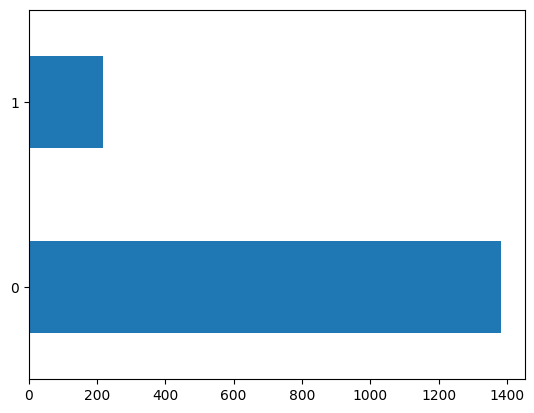

In [3]:
df["quality"] = df["quality"].apply(lambda x: 1 if x>6 else 0)
df["quality"].value_counts().plot.barh();
df["quality"].value_counts()

We get general information with the `info()` function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All of the independent variables are of float type and we can get more detailed information with the `describe()` function.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


There are no missing values.

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Pre-processing

Let's divide our data into train and test.

Thanks to the `stratify` parameter, `X_test` and `X_train` will contain 0 and 1 in the same ratio.

In [7]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

We create a data processing pipeline using `make_pipeline`. The pipeline includes StandardScaler and PCA implementations, respectively.

In [20]:
pipe = make_pipeline(StandardScaler(), PCA())

By applying the pipeline to the training dataset, we standardize the data and do size reduction with PCA. We apply these operations on training and test data.

In [21]:
X_train_pca = pipe.fit_transform(X_train)
X_test_pca = pipe.transform(X_test)

We calculate the explained ratios of variances (`explained_variance_ratio_`) and cumulative variances (`cumulative_variance`) of the components obtained after size reduction with PCA.

In [23]:
explained_variance = pipe.named_steps['pca'].explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [29]:
print(explained_variance)

[0.2801769  0.17563995 0.13957636 0.11081822 0.09021248 0.05908698
 0.05266627 0.03883888 0.03129468 0.01600997 0.0056793 ]


## Visualization

We visualize the training data using the first two components. We represent Component 1 and Component 2 on the x and y axes. We color the data points according to their class labels (`y_train`).

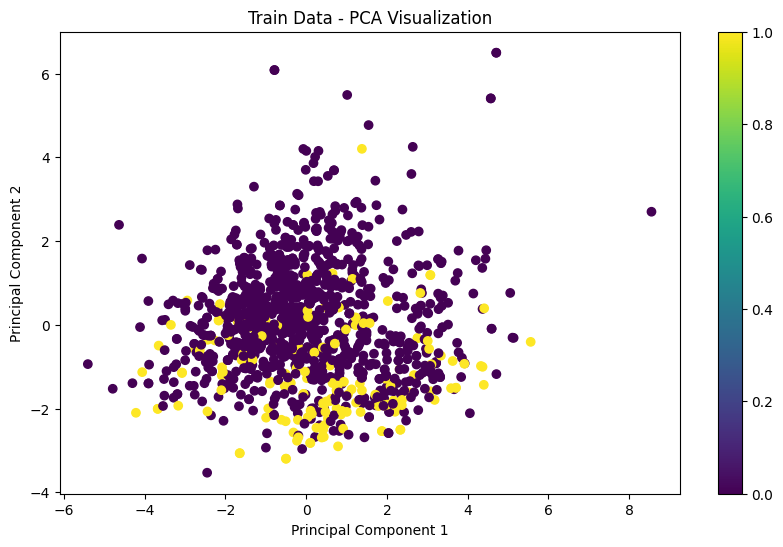

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Train Data - PCA Visualization')
plt.colorbar()
plt.show()

We visualize the test data using the first two components. Likewise, we represent Component 1 and Component 2 on the x and y axes. We color the data points according to their class labels (`y_test`).

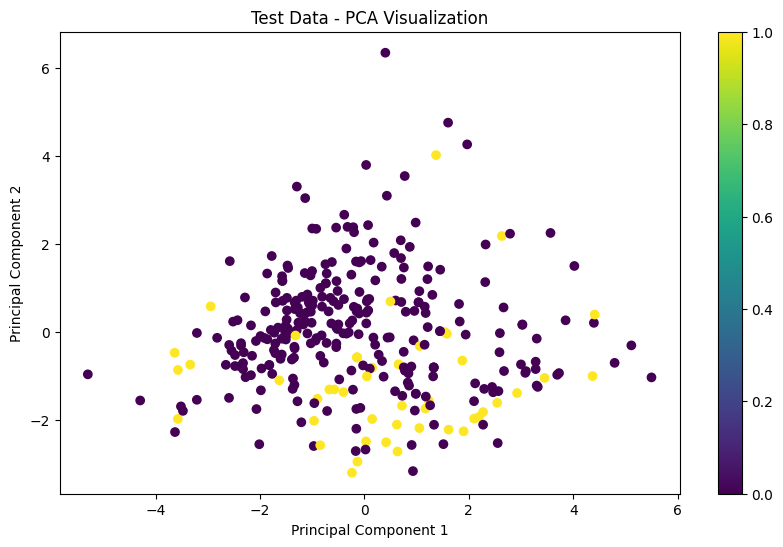

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Data - PCA Visualization')
plt.colorbar()
plt.show()

## Classifier Implementation

We build the logistic regression model and train it on the training data.

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

LogisticRegression()

Let's use `accuracy_score` to calculate the accuracy of the model on the training and test data

In [27]:
train_accuracy = logreg.score(X_train_pca, y_train)
test_accuracy = logreg.score(X_test_pca, y_test)

In [28]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8858483189992181
Test Accuracy: 0.865625


## Conclusion

According to the results, the logistic regression model achieved an accuracy of `88%` in the training data and `86%` in the test data. It is a positive sign that the model shows similar accuracy performance on training and test data.

However, other factors must be considered in order to definitively assess whether the model is useful. For example, factors such as class stability of the dataset, rates of bias or misclassification can affect the performance of the model.

Also, this evaluation only shows the performance of the logistic regression model after size reduction with PCA. Different feature selection methods, different classification models or hyperparameter adjustments can also be considered to further improve the performance of the model.

As a result, a model with 88% training and `86%` test accuracies is generally a pretty good starting point. In addition, the 86% accuracy rate of the test data set and the very close accuracy of the train data set indicate that there is no overfitting or underfitting.